In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



from gradient_boosting_trees.model import GBRegressionTrees, GBParams
from gradient_boosting_trees.regression.tree import RegressionTree
from gradient_boosting_trees.regression.cart.builder import TreeLevelNodeBuilder

# Setting up 2-D data (with one feature)

In [2]:
X = np.arange(5, step=0.001)
Y = np.cos(X**2)
X = X.reshape(len(X), 1)

In [4]:
X.shape

(5000, 1)

In [3]:
data = pd.DataFrame(list(zip(X.ravel(), Y)), columns=["X", "Y"])

# Fitting an approximation to the cosine function

In [11]:
builder = TreeLevelNodeBuilder(min_moints=150, max_level=100)
tree = RegressionTree(node_builder=builder)

In [12]:

builder_2 = TreeLevelNodeBuilder(min_moints=150, max_level=50)
tree_2 = RegressionTree(node_builder=builder_2)

In [6]:
tree.fit(points=X, labels=Y)

In [13]:
tree_2.fit(points=X, labels=Y)

In [7]:
predictions = tree.predict(X)

In [14]:

predictions2 = tree_2.predict(X)

In [15]:
data["predictions"] = predictions
data["predictions2"] = predictions2

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packag

<Axes: xlabel='X'>

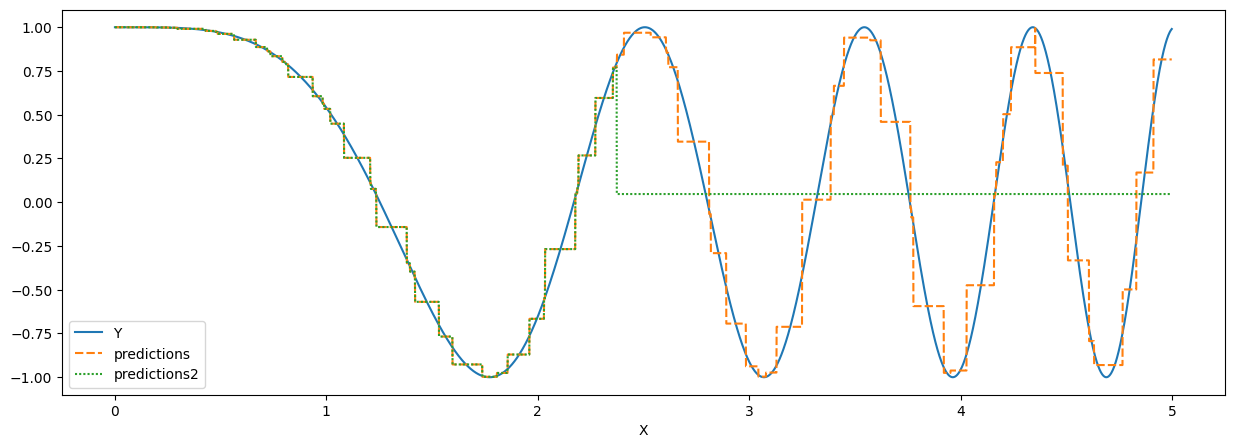

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(data.set_index("X"))

# Setting up 3D data (with 2 features)

In [132]:
X = np.arange(20, step=0.01)
Y = np.arange(10, 30, step=0.01)
Z = np.cos(X*Y)
# X = X.reshape(len(X), 1)

In [133]:
builder = TreeLevelNodeBuilder(min_moints=30, max_level=300)
tree = RegressionTree(node_builder=builder)

In [134]:
points = np.hstack([X.reshape(len(X), 1), Y.reshape(len(Y), 1)])

In [135]:
tree.fit(points=points, labels=Z)

In [136]:
predictions = tree.predict(points=points)

In [137]:
data = pd.DataFrame(list(zip(X.ravel(), Y.ravel(), Z, ["Z" for _ in range(len(Z))])), columns=["X", "Y", "Z", "Type"])

In [138]:
data_pred = pd.DataFrame(list(zip(X.ravel(), Y.ravel(), predictions, ["Predictions" for _ in range(len(Z))])), columns=["X", "Y", "Z", "Type"])

In [139]:
plot_data = pd.concat([data, data_pred])

In [140]:
px.line_3d(data_frame=plot_data, x="X", y="Y", z="Z", width=1000, height=1000, color="Type")

## Gradient Boosting

In [17]:
params = GBParams(shrinkage=0.01)
builder = TreeLevelNodeBuilder(min_moints=150, max_level=100)
gradient_boosting  = GBRegressionTrees(params=params, node_builder=builder)

In [18]:
X = np.arange(20, step=0.01)
Y = np.cos(X)
X = X.reshape(len(X), 1)

In [19]:
gradient_boosting.fit(points=X, labels=Y, n_iterations=200)

100%|██████████| 200/200 [00:39<00:00,  5.00it/s]


In [6]:
gb_predictions = gradient_boosting.predict(points=X)

In [7]:
builder = TreeLevelNodeBuilder(min_moints=150, max_level=100)
tree = RegressionTree(node_builder=builder)

In [8]:
tree.fit(points=X, labels=Y)

In [9]:
tree_preds = tree.predict(X)

<Axes: >

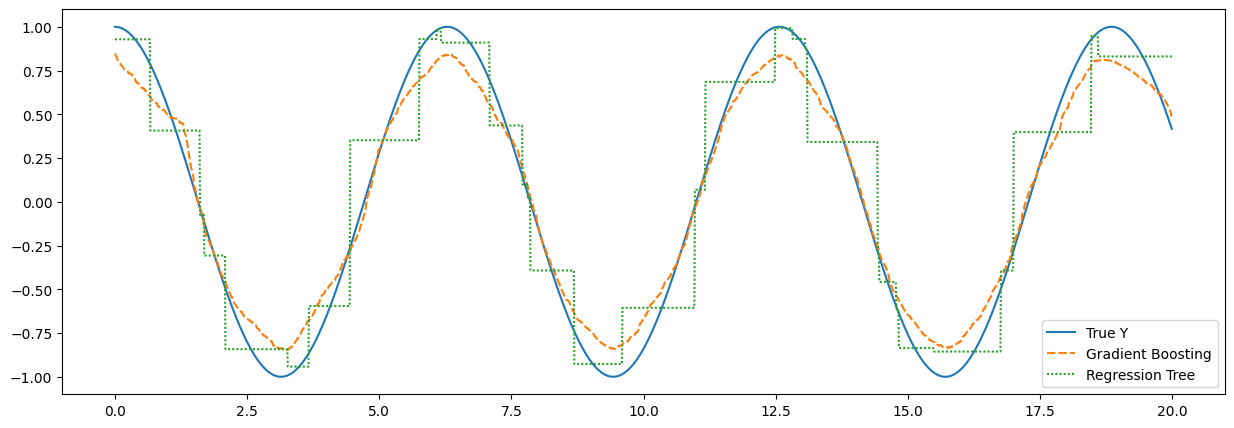

In [11]:
plt.figure(figsize=(15, 5))

data = pd.DataFrame(index=X.ravel(), data=list(zip(Y, gb_predictions, tree_preds)), columns=["True Y", "Gradient Boosting", "Regression Tree"])
sns.lineplot(data=data)

### Sigmoid objective

In [8]:
X = np.arange(10000)
Y = np.array([1.0 if x % 2 == 0 else 0.0 for x in range(10000)])
X = X.reshape(len(X) , 1)

In [9]:
params = GBParams(shrinkage=0.01)
builder = TreeLevelNodeBuilder(min_moints=150, max_level=100)
gradient_boosting  = GBRegressionTrees(params=params, node_builder=builder)
gradient_boosting2  = GBRegressionTrees(params=params, node_builder=builder, objective="log_loss")

In [10]:
gradient_boosting.fit(points=X, labels=Y, n_iterations=200)

100%|██████████| 200/200 [02:25<00:00,  1.37it/s]


In [ ]:
gradient_boosting2.fit(points=X, labels=Y, n_iterations=200)

100%|██████████| 200/200 [02:34<00:00,  1.29it/s]


In [11]:
gb_predictions = gradient_boosting.predict(points=X)

In [17]:
gb_predictions2 = gradient_boosting2.predict(points=X)

In [19]:
X

array([[   0],
       [   1],
       [   2],
       ...,
       [9997],
       [9998],
       [9999]])

In [13]:

plt.figure(figsize=(15, 5))

data = pd.DataFrame(index=X.ravel(), data=list(zip(Y, gb_predictions, gb_predictions2)), columns=["True Y", "Gradient Boosting SQ" , "Gradient Boosting  Sigmoid" ])
sns.lineplot(data=data)

TypeError: 'int' object is not iterable

<Figure size 1500x500 with 0 Axes>

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


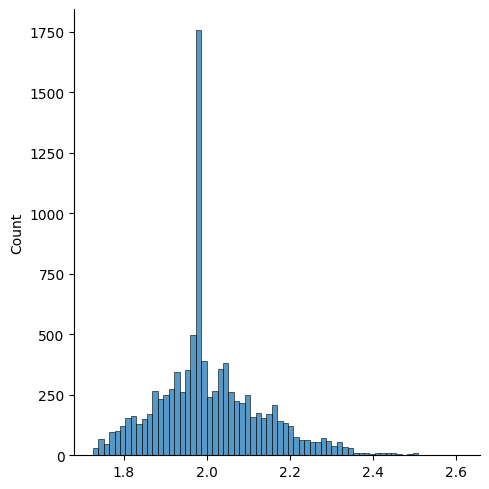

In [12]:
sns.displot(gb_predictions2)

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


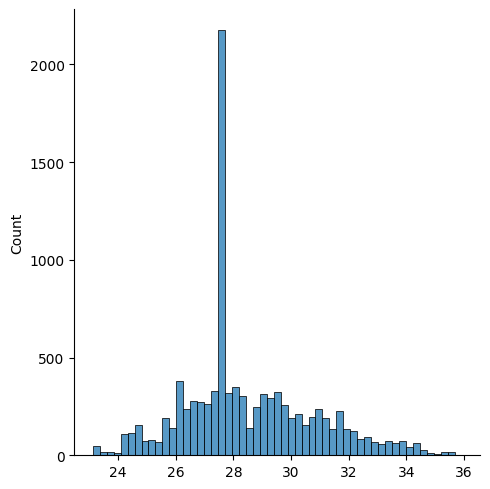

In [13]:
sns.displot(gb_predictions)

/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andre.fernandes/anaconda3/envs/gradient-boosting-trees/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


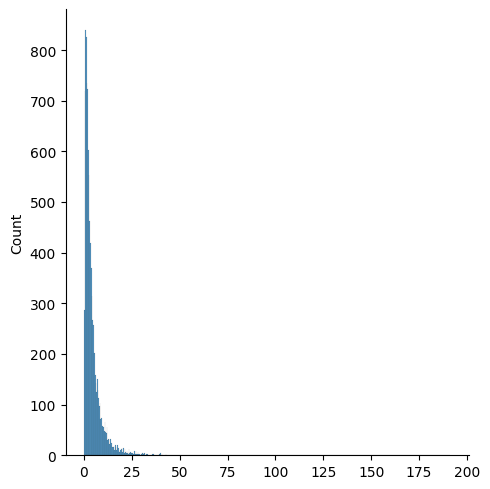

In [46]:
sns.displot(np.random.lognormal(1, 1, 10000))